### Without Checkpointer

In [1]:
from langgraph.graph import StateGraph, START, END, MessagesState
from langchain_openai import ChatOpenAI

from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
def call_model(state: MessagesState):
    response = model.invoke(state['messages'])
    return{'messages': [response]}

In [5]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)

builder.add_edge(START, 'call_model')

graph = builder.compile()

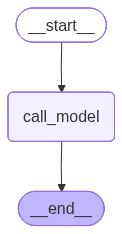

In [6]:
graph

In [7]:
graph.invoke({'messages': [{"role": "user", "content": "Hi, My name is Shreyas"}]})

{'messages': [HumanMessage(content='Hi, My name is Shreyas', additional_kwargs={}, response_metadata={}, id='f2b8d463-65c7-4e68-a38c-4267919d6d3a'),
  AIMessage(content='Hello Shreyas! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 15, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Czd6Xat5JUMlfLb1FFdpdPzzMKysZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bd4f4-a09f-7e30-af3c-c34c9e9498b5-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 12, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_

In [8]:
graph.invoke({'messages': [{"role": "user", "content": "What is my name?"}]})

{'messages': [HumanMessage(content='What is my name?', additional_kwargs={}, response_metadata={}, id='7ef3bba8-d9d1-4906-9d33-c635fed8c220'),
  AIMessage(content="I'm sorry, I don't have that information. You are welcome to share your name with me if you'd like.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 12, 'total_tokens': 37, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Czd74y2zCMcp2DoEPS7X5YmLGRff2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bd4f5-1ed7-77d2-b56c-3c3b1a07cf00-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 12, 'output_tokens': 25, 'total_tokens': 37, 'input_toke

### With In Memory Checkpointer

In [10]:
from langgraph.checkpoint.memory import InMemorySaver

In [9]:
def call_model(state: MessagesState):
    response = model.invoke(state['messages'])
    return{'messages': [response]}

In [11]:
builder = StateGraph(MessagesState)

builder.add_node("call_model", call_model)

builder.add_edge(START, 'call_model')

# Checkpointer
checkpointer = InMemorySaver()

# Compile the graph
graph = builder.compile(checkpointer=checkpointer)

In [12]:
config = {"configurable": {"thread_id": "thread_1"}}

In [13]:
graph.invoke({'messages': [{"role": "user", "content": "Hi, My name is Shreyas"}]}, config=config)

{'messages': [HumanMessage(content='Hi, My name is Shreyas', additional_kwargs={}, response_metadata={}, id='7e599974-4fe4-4167-aa26-3e447a14e4d0'),
  AIMessage(content='Hello Shreyas, nice to meet you! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 15, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CzdFuLmRI9Ukw49aX0YZBbgvL5wnJ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bd4fd-7e1f-7af2-9334-75499bed93df-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 17, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_r

In [14]:
graph.invoke({'messages': [{"role": "user", "content": "What is my name?"}]}, config=config)

{'messages': [HumanMessage(content='Hi, My name is Shreyas', additional_kwargs={}, response_metadata={}, id='7e599974-4fe4-4167-aa26-3e447a14e4d0'),
  AIMessage(content='Hello Shreyas, nice to meet you! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 15, 'total_tokens': 32, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CzdFuLmRI9Ukw49aX0YZBbgvL5wnJ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019bd4fd-7e1f-7af2-9334-75499bed93df-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 15, 'output_tokens': 17, 'total_tokens': 32, 'input_token_details': {'audio': 0, 'cache_r

In [15]:
snap = graph.get_state(config)
vals = snap.values
for m in vals.get("messages", []):
        print("-", type(m).__name__, ":", m.content)

- HumanMessage : Hi, My name is Shreyas
- AIMessage : Hello Shreyas, nice to meet you! How can I assist you today?
- HumanMessage : What is my name?
- AIMessage : Your name is Shreyas.
